# Base de Dados do Censo

In [ ]:
# O requirements.txt contém todas as bibliotecas necessárias para o projeto. 
%pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
base_census = pd.read_csv(r'census.csv')

In [3]:
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [4]:
base_census.shape

(32561, 15)

In [5]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [6]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização de Dados

In [7]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

C:\Users\rafae\AppData\Local\Temp\ipykernel_15968\1614142575.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=base_census['income'], palette='viridis');


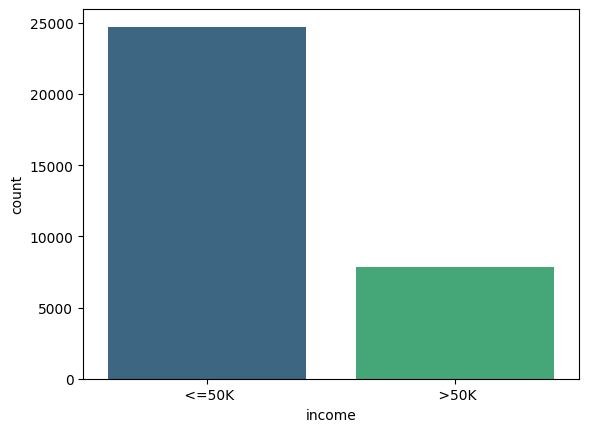

In [8]:
sns.countplot(x=base_census['income'], palette='viridis');

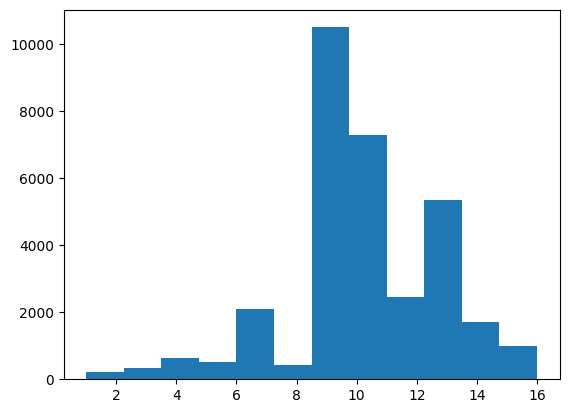

In [9]:
plt.hist(base_census['education-num'], bins=12 );

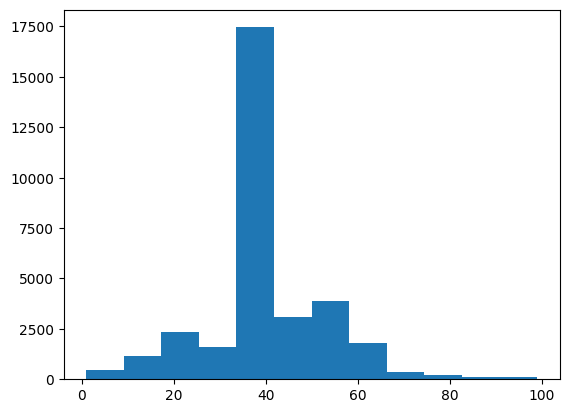

In [10]:
plt.hist(base_census['hour-per-week'], bins=12 );

In [11]:
grafico = px.treemap(base_census, path=['workclass','age'])
grafico.show()

In [12]:
grafico = px.treemap(base_census, path=['occupation','relationship','age'])
grafico.show()

In [13]:
grafico = px.parallel_categories(base_census,dimensions=['occupation','relationship'])
grafico.show()

In [14]:
grafico = px.parallel_categories(base_census,dimensions=['workclass','occupation','income'])
grafico.show()

In [15]:
grafico = px.parallel_categories(base_census,dimensions=['education','income'])
grafico.show()

# Divisão entre previsores e classe

In [16]:
base_census.columns.size

15

In [17]:
x_census = base_census.iloc[:,0:14].values

In [18]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [19]:
y_census = base_census.iloc[:,14].values

In [20]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Tratamento de atributos categóricos

### Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
test=LabelEncoder().fit_transform(x_census[:,1])

In [23]:
test

array([7, 6, 4, ..., 4, 4, 5])

In [24]:
show=enumerate(x_census[0])

In [25]:
show

In [26]:
indices=[]
for index,value in enumerate(x_census[0]):
    if type(value) == str:
        indices.append(index)
        print(index,value)
        

    

1  State-gov
3  Bachelors
5  Never-married
6  Adm-clerical
7  Not-in-family
8  White
9  Male
13  United-States


In [27]:
x_census2 = x_census.copy()

In [28]:
indices

[1, 3, 5, 6, 7, 8, 9, 13]

In [29]:
for i in indices:
    x_census2[:,i] = LabelEncoder().fit_transform(x_census2[:,i])

In [30]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [31]:
x_census2[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### OneHot Encoder

O One Hot Encoder é excelente quando queremos gerar dados com 0 e 1 nas suas devidas colunas

In [32]:
np.unique(base_census['workclass'], return_counts=True)[0]

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [33]:
len(np.unique(base_census['workclass'], return_counts=True)[0])

9

In [34]:
len(np.unique(base_census['occupation'], return_counts=True)[0])

15

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
onehotencoder_census=ColumnTransformer(transformers=[("OneHot",OneHotEncoder(),indices)],remainder='passthrough')

In [37]:
onehotencoder_census

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(),
                                 [1, 3, 5, 6, 7, 8, 9, 13])])

In [38]:
x_census_onehot = onehotencoder_census.fit_transform(x_census2).toarray()

In [51]:
x_census_onehot.shape

(32561, 108)

In [39]:
x_census_onehot[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

## Escalonamento dos valores

In [40]:
from sklearn.preprocessing import StandardScaler
x_census_scaled=StandardScaler().fit_transform(x_census_onehot)

In [41]:
x_census_scaled[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão de bases em treinamento e teste

In [42]:
from sklearn.model_selection import train_test_split


In [56]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census_scaled, y_census, test_size=0.15, random_state=0)

In [59]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [60]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [63]:
!pip show pickle-mixin

Name: pickle-mixin
Version: 1.0.2
Summary: Makes un-pickle-able objects pick-able.
Home-page: https://github.com/limix/pickle-mixin
Author: 
Author-email: 
License: MIT
Location: c:\users\rafae\onedrive\escritorio\machine imitatione\chck_my_mchn\lib\site-packages
Requires: 
Required-by: 


In [64]:
import pickle

In [66]:
with open('census.pkl','wb') as f:
    pickle.dump([x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste],f)